In [5]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

pd.options.display.float_format = '{:.4f}'.format

Load the dataset to know what is in each column.

In [6]:
data = pd.read_excel('regression_data.xls')

To understand the dataset

In [7]:
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.0000,1180,5650,1.0000,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650,221900
1,6414100192,2014-12-09,3,2.2500,2570,7242,2.0000,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.3190,1690,7639,538000
2,5631500400,2015-02-25,2,1.0000,770,10000,1.0000,0,0,3,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062,180000
3,2487200875,2014-12-09,4,3.0000,1960,5000,1.0000,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000,604000
4,1954400510,2015-02-18,3,2.0000,1680,8080,1.0000,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503,510000


In [8]:
data.shape

(21597, 21)

data.info()

Could there be any white spaces or nulls in the dataset?

In [9]:
data.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

Sometimes nulls may not easily be detected, so still used ' .replace' to take any that may be underlying in the dataset.

In [10]:
data = data.replace(' ', np.nan)

In [11]:
data.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [12]:
data.dtypes

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

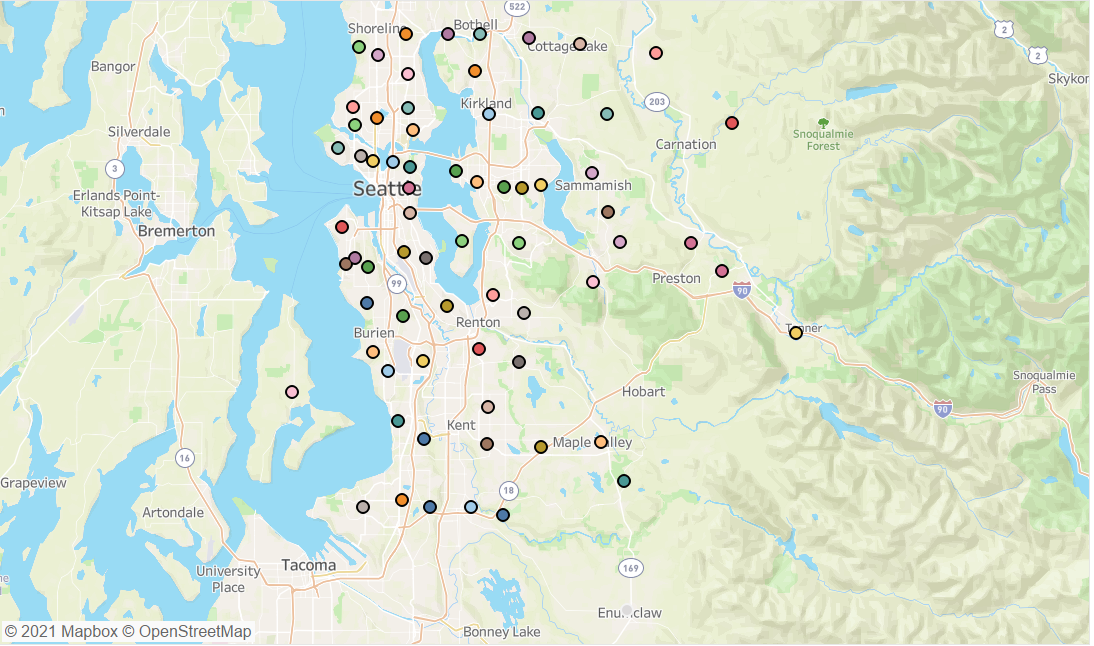

In [123]:
from IPython.display import Image
# Load image from local storage
Image(filename = "Seattle Map.PNG", width = 1000, height = 300)


Again no white space or nulls found. Dataset was pretty clean.

# EXPLORATORY DATA ANALYSIS #

In [13]:
data.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,21597.0000,21597.0000,21597.0000,21597.0000,21597.0000,21597.0000,21597.0000,21597.0000,21597.0000,21597.0000,21597.0000,21597.0000,21597.0000,21597.0000,21597.0000,21597.0000,21597.0000,21597.0000,21597.0000,21597.0000
mean,4580474287.7710,3.3732,2.1158,2080.3219,15099.4088,1.4941,0.0075,0.2343,3.4098,7.6579,1788.5968,291.7250,1970.9997,84.4648,98077.9518,47.5601,-122.2140,1986.6203,12758.2835,540296.5735
std,2876735715.7478,0.9263,0.7690,918.1061,41412.6369,0.5397,0.0865,0.7664,0.6505,1.1732,827.7598,442.6678,29.3752,401.8214,53.5131,0.1386,0.1407,685.2305,27274.4420,367368.1401
min,1000102.0000,1.0000,0.5000,370.0000,520.0000,1.0000,0.0000,0.0000,1.0000,3.0000,370.0000,0.0000,1900.0000,0.0000,98001.0000,47.1559,-122.5190,399.0000,651.0000,78000.0000
25%,2123049175.0000,3.0000,1.7500,1430.0000,5040.0000,1.0000,0.0000,0.0000,3.0000,7.0000,1190.0000,0.0000,1951.0000,0.0000,98033.0000,47.4711,-122.3280,1490.0000,5100.0000,322000.0000
50%,3904930410.0000,3.0000,2.2500,1910.0000,7618.0000,1.5000,0.0000,0.0000,3.0000,7.0000,1560.0000,0.0000,1975.0000,0.0000,98065.0000,47.5718,-122.2310,1840.0000,7620.0000,450000.0000
75%,7308900490.0000,4.0000,2.5000,2550.0000,10685.0000,2.0000,0.0000,0.0000,4.0000,8.0000,2210.0000,560.0000,1997.0000,0.0000,98118.0000,47.6780,-122.1250,2360.0000,10083.0000,645000.0000
max,9900000190.0000,33.0000,8.0000,13540.0000,1651359.0000,3.5000,1.0000,4.0000,5.0000,13.0000,9410.0000,4820.0000,2015.0000,2015.0000,98199.0000,47.7776,-121.3150,6210.0000,871200.0000,7700000.0000


Above, by describing the dataset we clearly get an understanding of the variability of the set of measurements i.e the spread of the data

In [14]:
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.0000,1180,5650,1.0000,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650,221900
1,6414100192,2014-12-09,3,2.2500,2570,7242,2.0000,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.3190,1690,7639,538000
2,5631500400,2015-02-25,2,1.0000,770,10000,1.0000,0,0,3,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062,180000
3,2487200875,2014-12-09,4,3.0000,1960,5000,1.0000,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000,604000
4,1954400510,2015-02-18,3,2.0000,1680,8080,1.0000,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503,510000


How many properties sold per zipcode?

In [15]:
data.zipcode.value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

To be able to use the value counts data output, we need to turn it into a dataframe where indexes will be set in a table form.

In [16]:
data.zipcode.value_counts().reset_index()

,index,zipcode
0,98103,602
1,98038,589
2,98115,583
3,98052,574
4,98117,553
...,...,...
65,98102,104
66,98010,100
67,98024,80
68,98148,57


Now we have renamed the columns by their right names using reset_index.

In [17]:
data.zipcode.value_counts().reset_index().rename(columns=({'index':'zipcode', 'zipcode':'Total_house_sold'}))

,zipcode,Total_house_sold
0,98103,602
1,98038,589
2,98115,583
3,98052,574
4,98117,553
...,...,...
65,98102,104
66,98010,100
67,98024,80
68,98148,57


The five zipcodes with most sold properties between May 2014 to May 2015.

In [18]:
highest_zip = data.zipcode.value_counts().reset_index().rename(columns=({'index':'zipcode', 'zipcode':'Total_house_sold'})).head()

In [19]:
highest_zip

,zipcode,Total_house_sold
0,98103,602
1,98038,589
2,98115,583
3,98052,574
4,98117,553


We placed the above output in a barplot so that patterns, trends and correlations there in are exposed for better understanding.

<AxesSubplot:xlabel='zipcode', ylabel='Total_house_sold'>

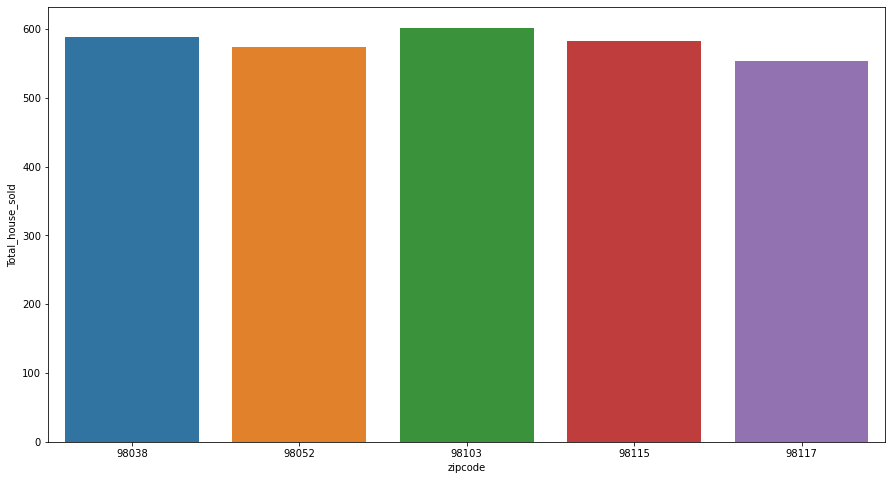

In [20]:
plt.figure(figsize=(15,8))
sns.barplot(highest_zip['zipcode'], highest_zip['Total_house_sold'])

And the five zipcodes with low property sales?

In [21]:
lowest_zip = data.zipcode.value_counts().reset_index().rename(columns=({'index':'zipcode', 'zipcode':'Total_house_sold'})).tail()

In [22]:
lowest_zip

,zipcode,Total_house_sold
65,98102,104
66,98010,100
67,98024,80
68,98148,57
69,98039,50


To best visualise it we used a barplot.

<AxesSubplot:xlabel='zipcode', ylabel='Total_house_sold'>

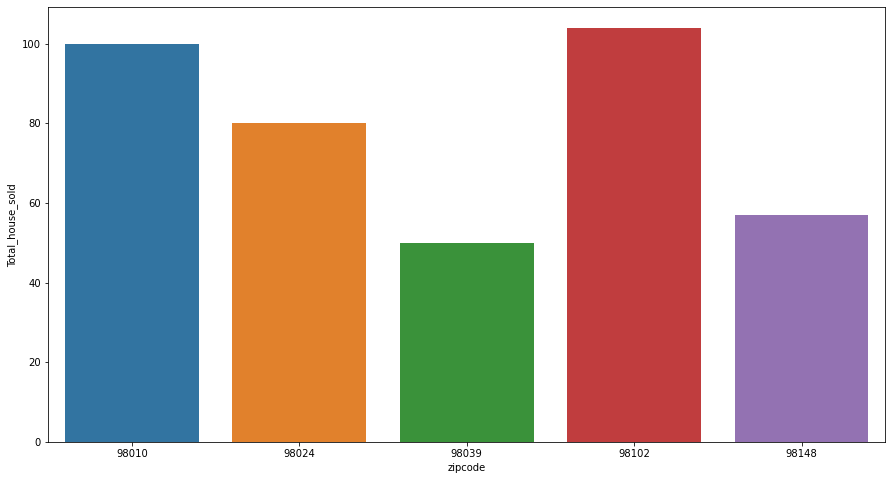

In [23]:
plt.figure(figsize=(15,8))
sns.barplot(lowest_zip['zipcode'], lowest_zip['Total_house_sold'])

Our most expensive neighbourhood (Medina) is the bad sales performer in terms of number of properties sold as per our dataset. Also found iut that is home to the likes of jeff Bezos and Bill Gates.

The top property seller zipcode 98038, is Maple Valley in  King County is a middle class area.

Now we would like to check the median price of properties as per zipcode against the dependent value(price).

In [24]:
data.groupby('zipcode')['price'].median().reset_index().sort_values('price', ascending = False)

,zipcode,price
24,98039,1895000.0000
3,98004,1150000.0000
25,98040,993750.0000
48,98112,915000.0000
4,98005,765475.0000
...,...,...
67,98188,264000.0000
0,98001,260000.0000
20,98032,249000.0000
1,98002,235000.0000


And the median price for the most expensive neighbourhoods in our dataset?

In [25]:
most_expensive = data.groupby('zipcode')['price'].median().reset_index().sort_values('price',
                                                                    ascending = False).rename(columns=({'index':'zipcode',
                                                                                                        'price': 'median_price'})).head()

In [26]:
most_expensive.reset_index(drop=True)

,zipcode,median_price
0,98039,1895000.0000
1,98004,1150000.0000
2,98040,993750.0000
3,98112,915000.0000
4,98005,765475.0000


<AxesSubplot:xlabel='zipcode', ylabel='median_price'>

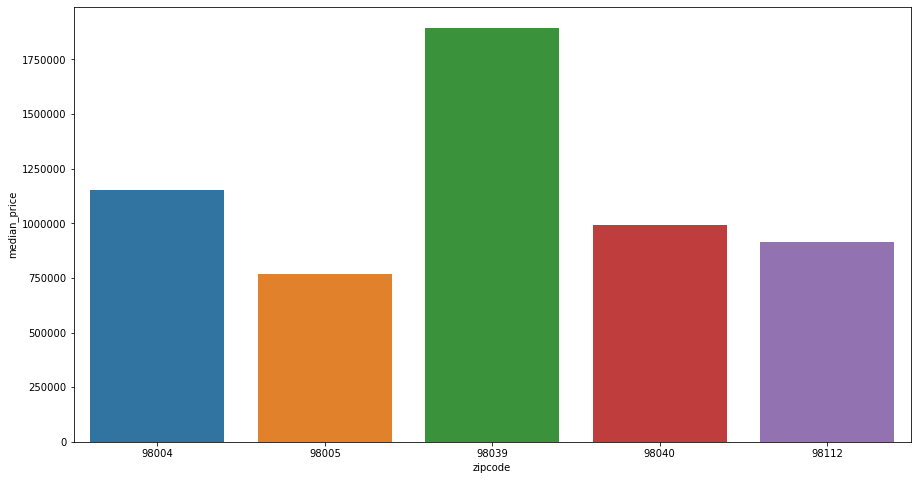

In [27]:
plt.figure(figsize=(15,8))
plt.ticklabel_format(axis='y', style='plain')
sns.barplot(most_expensive['zipcode'], most_expensive['median_price'])

And the median price for the least expensive neighbourhoods in our dataset?

In [28]:
least_expensive = data.groupby('zipcode')['price'].median().reset_index().sort_values('price',
                                                                    ascending = False).rename(columns=({'index':'zipcode',
                                                                                                        'price': 'median_price'})).tail()

In [29]:
least_expensive.reset_index(drop=True)

,zipcode,median_price
0,98188,264000.0000
1,98001,260000.0000
2,98032,249000.0000
3,98002,235000.0000
4,98168,235000.0000


<AxesSubplot:xlabel='zipcode', ylabel='median_price'>

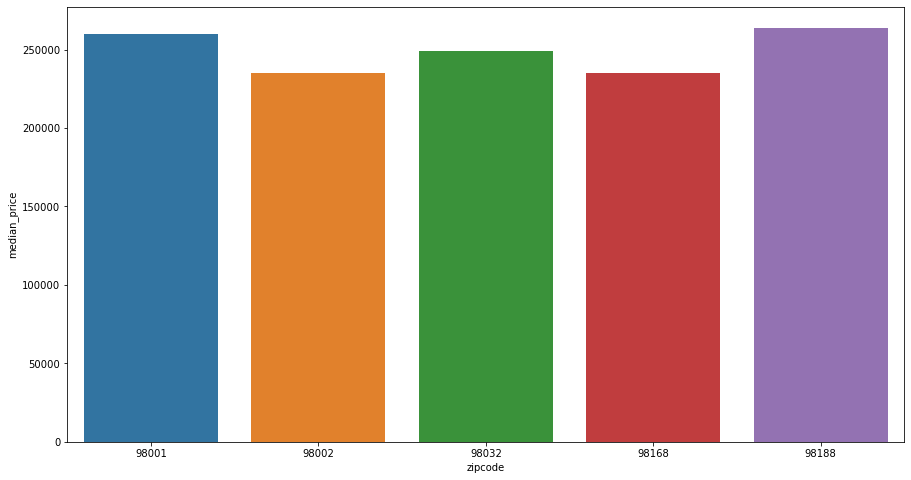

In [30]:
plt.figure(figsize=(15,8))
plt.ticklabel_format(axis='y', style='plain')
sns.barplot(least_expensive['zipcode'], least_expensive['median_price'])

Are there any factors responsible for higher property value of 650K?

In [31]:
data.loc[data['price']  > 650000].corr()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,1.0000,-0.0175,-0.0676,-0.0705,-0.1451,-0.0253,0.0077,0.0201,0.0218,-0.0679,-0.0760,0.0040,-0.0254,-0.0057,-0.0122,-0.0057,0.0154,-0.0263,-0.1385,-0.0512
bedrooms,-0.0175,1.0000,0.4379,0.4488,-0.0120,0.1497,-0.0581,-0.0198,-0.0237,0.2018,0.3459,0.2103,0.0890,-0.0153,-0.1190,-0.0317,0.1081,0.2241,-0.0028,0.2027
bathrooms,-0.0676,0.4379,1.0000,0.7409,0.1077,0.3552,0.0504,0.1194,-0.1934,0.5787,0.6341,0.2391,0.4144,0.0438,-0.1484,-0.1078,0.2291,0.3976,0.1326,0.4636
sqft_living,-0.0705,0.4488,0.7409,1.0000,0.1743,0.2991,0.0770,0.1798,-0.1815,0.7041,0.8377,0.3538,0.3757,-0.0161,-0.2026,-0.1360,0.3138,0.6039,0.2160,0.6061
sqft_lot,-0.1451,-0.0120,0.1077,0.1743,1.0000,0.0177,0.0075,0.0164,-0.0564,0.1334,0.2017,-0.0337,0.1169,-0.0344,-0.1355,-0.2059,0.2822,0.0794,0.7322,0.0310
floors,-0.0253,0.1497,0.3552,0.2991,0.0177,1.0000,0.0015,-0.0774,-0.2901,0.3877,0.5145,-0.3463,0.3432,-0.0092,0.0062,-0.0190,0.1575,0.1542,0.0316,0.1229
waterfront,0.0077,-0.0581,0.0504,0.0770,0.0075,0.0015,1.0000,0.4271,0.0044,0.0430,0.0265,0.0922,-0.0299,0.0985,0.0684,-0.1132,-0.0571,0.0484,0.0126,0.3124
view,0.0201,-0.0198,0.1194,0.1798,0.0164,-0.0774,0.4271,1.0000,0.0556,0.1311,0.0016,0.3188,-0.0898,0.1152,0.1658,-0.1452,-0.1839,0.1698,0.0113,0.3392
condition,0.0218,-0.0237,-0.1934,-0.1815,-0.0564,-0.2901,0.0044,0.0556,1.0000,-0.2907,-0.3148,0.2146,-0.4789,-0.1067,0.1034,0.0227,-0.2696,-0.1665,-0.0684,0.0044
grade,-0.0679,0.2018,0.5787,0.7041,0.1334,0.3877,0.0430,0.1311,-0.2907,1.0000,0.7239,0.0195,0.5008,-0.0690,-0.2230,-0.1422,0.3363,0.6181,0.1764,0.5044


There is no correlation bettween the independent variables and price except for the price itself. 

In [32]:
data.loc[data['zipcode'] == 98103]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
17,6865200140,2014-05-29,4,1.0000,1600,4300,1.5000,0,0,4,7,1600,0,1916,0,98103,47.6648,-122.3430,1610,4300,485000
111,3362400511,2015-03-04,3,1.7500,1260,3328,1.0000,0,0,5,6,700,560,1905,0,98103,47.6823,-122.3490,1380,3536,570000
116,3362400431,2014-06-26,3,3.5000,1590,1102,3.0000,0,0,3,8,1590,0,2010,0,98103,47.6824,-122.3470,1620,3166,518500
128,2331300505,2014-06-13,5,3.5000,2320,4960,2.0000,0,0,5,7,1720,600,1926,0,98103,47.6763,-122.3520,1700,4960,822500
149,1994200024,2014-11-04,3,1.0000,1430,3455,1.0000,0,0,3,7,980,450,1947,0,98103,47.6873,-122.3360,1450,4599,511000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21551,9521100031,2014-06-18,3,3.2500,1540,1428,3.0000,0,0,3,9,1540,0,2013,0,98103,47.6648,-122.3530,1660,3300,690000
21558,1931300090,2014-05-07,3,3.0000,1680,1570,3.0000,0,0,3,8,1680,0,2014,0,98103,47.6572,-122.3460,1640,4800,610950
21576,1931300412,2015-04-16,3,2.2500,1190,1200,3.0000,0,0,3,8,1190,0,2008,0,98103,47.6542,-122.3460,1180,1224,475000
21579,1972201967,2014-10-31,2,2.2500,1530,981,3.0000,0,0,3,8,1480,50,2006,0,98103,47.6533,-122.3460,1530,1282,520000


# LINEAR REGRESSION #

To understand the relationship between the dependent variable and independent variables we used correlation

In [33]:
data.corr()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,1.0000,0.0012,0.0052,-0.0122,-0.1319,0.0186,-0.0027,0.0115,-0.0238,0.0082,-0.0108,-0.0052,0.0216,-0.0169,-0.0082,-0.0018,0.0207,-0.0027,-0.1386,-0.0168
bedrooms,0.0012,1.0000,0.5145,0.5782,0.0325,0.1779,-0.0068,0.0800,0.0265,0.3566,0.4794,0.3028,0.1557,0.0184,-0.1541,-0.0100,0.1321,0.3934,0.0307,0.3088
bathrooms,0.0052,0.5145,1.0000,0.7558,0.0884,0.5026,0.0637,0.1884,-0.1265,0.6658,0.6867,0.2834,0.5072,0.0505,-0.2048,0.0243,0.2249,0.5699,0.0883,0.5259
sqft_living,-0.0122,0.5782,0.7558,1.0000,0.1735,0.3540,0.1039,0.2847,-0.0594,0.7628,0.8764,0.4351,0.3182,0.0553,-0.1998,0.0522,0.2412,0.7564,0.1843,0.7019
sqft_lot,-0.1319,0.0325,0.0884,0.1735,1.0000,-0.0048,0.0216,0.0749,-0.0088,0.1147,0.1841,0.0154,0.0529,0.0077,-0.1296,-0.0855,0.2302,0.1448,0.7182,0.0899
floors,0.0186,0.1779,0.5026,0.3540,-0.0048,1.0000,0.0238,0.0288,-0.2641,0.4588,0.5240,-0.2457,0.4892,0.0064,-0.0595,0.0492,0.1259,0.2801,-0.0107,0.2568
waterfront,-0.0027,-0.0068,0.0637,0.1039,0.0216,0.0238,1.0000,0.4020,0.0166,0.0829,0.0721,0.0806,-0.0262,0.0929,0.0303,-0.0143,-0.0419,0.0865,0.0308,0.2664
view,0.0115,0.0800,0.1884,0.2847,0.0749,0.0288,0.4020,1.0000,0.0460,0.2517,0.1676,0.2771,-0.0536,0.1040,0.0846,0.0059,-0.0781,0.2807,0.0729,0.3974
condition,-0.0238,0.0265,-0.1265,-0.0594,-0.0088,-0.2641,0.0166,0.0460,1.0000,-0.1469,-0.1589,0.1738,-0.3616,-0.0608,0.0029,-0.0151,-0.1059,-0.0931,-0.0031,0.0361
grade,0.0082,0.3566,0.6658,0.7628,0.1147,0.4588,0.0829,0.2517,-0.1469,1.0000,0.7561,0.1682,0.4479,0.0143,-0.1858,0.1136,0.2003,0.7139,0.1210,0.6680


Date is dropped since it is not significant to the model especially when checking for a correlation

In [34]:
data.drop(['date'], axis = 1)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,3,1.0000,1180,5650,1.0000,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650,221900
1,6414100192,3,2.2500,2570,7242,2.0000,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.3190,1690,7639,538000
2,5631500400,2,1.0000,770,10000,1.0000,0,0,3,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062,180000
3,2487200875,4,3.0000,1960,5000,1.0000,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000,604000
4,1954400510,3,2.0000,1680,8080,1.0000,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3,2.5000,1530,1131,3.0000,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.3460,1530,1509,360000
21593,6600060120,4,2.5000,2310,5813,2.0000,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.3620,1830,7200,400000
21594,1523300141,2,0.7500,1020,1350,2.0000,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.2990,1020,2007,402101
21595,291310100,3,2.5000,1600,2388,2.0000,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.0690,1410,1287,400000


In [35]:
corr = data.corr()

<AxesSubplot:>

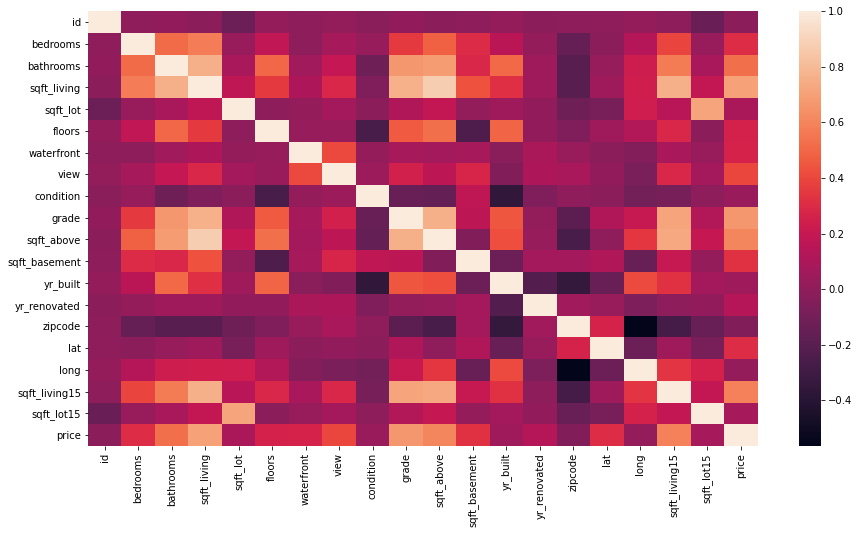

In [36]:
plt.figure(figsize=(15,8))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

From the correlation sqft_living and price discovered to be highly correlated, since simple linear regression takes one dependent variable and one independent variable. sqft_living and price are best fit to test the model.

In [37]:
x = data[['sqft_living']]
y = data[['price']]

In [38]:
x

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680
...,...
21592,1530
21593,2310
21594,1020
21595,1600


In [39]:
y

,price
0,221900
1,538000
2,180000
3,604000
4,510000
...,...
21592,360000
21593,400000
21594,402101
21595,400000


An outlier was discovered and dropped  which doesnot represent the overall square living based on price. 

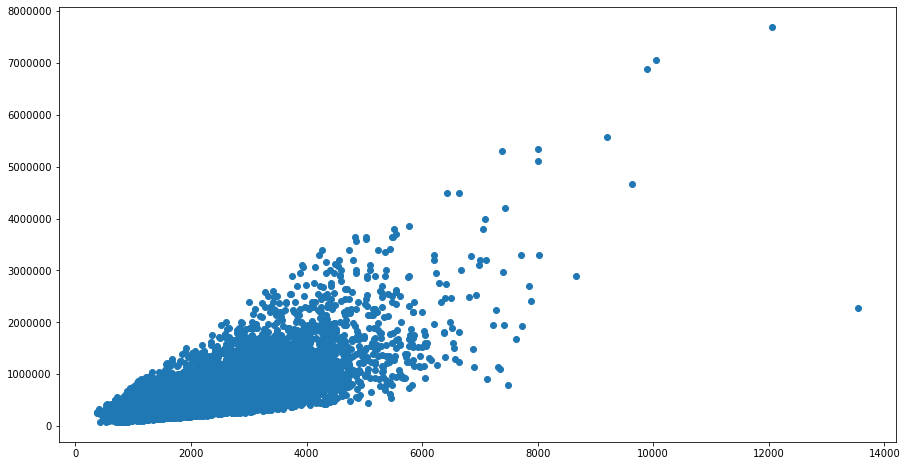

In [40]:
plt.figure(figsize=(15,8))
plt.ticklabel_format(axis='y', style='plain')
plt.scatter(x, y)

In [41]:
data.loc[data['zipcode'] == 98053][['price']].sort_values('price', ascending = False)

,price
12764,2280000
8436,2140000
6495,1940000
14295,1800000
10901,1770000
...,...
6231,300000
11516,265000
11574,259875
18910,225000


Filtering the outlier to see its general information

In [43]:
data.loc[data['sqft_living'] > 13000]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
12764,1225069038,2014-05-05,7,8.0000,13540,307752,3.0000,0,4,3,12,9410,4130,1999,0,98053,47.6675,-121.9860,4850,217800,2280000


In [44]:
temp_df = data[['sqft_living', 'price']]

In [45]:
temp_df

,sqft_living,price
0,1180,221900
1,2570,538000
2,770,180000
3,1960,604000
4,1680,510000
...,...,...
21592,1530,360000
21593,2310,400000
21594,1020,402101
21595,1600,400000


In [46]:
temp_df.loc[temp_df['sqft_living'] > 13000]

,sqft_living,price
12764,13540,2280000


In [47]:
temp_df.iloc[12764]

sqft_living      13540
price          2280000
Name: 12764, dtype: int64

In [48]:
temp_df.drop(index = [12764], inplace=True)

In [49]:
temp_df.loc[temp_df['sqft_living'] > 13000]

,sqft_living,price


After dropping the outlier sqft_living and price is reploted again 

In [50]:
X = temp_df[['sqft_living']]
Y = temp_df[['price']]

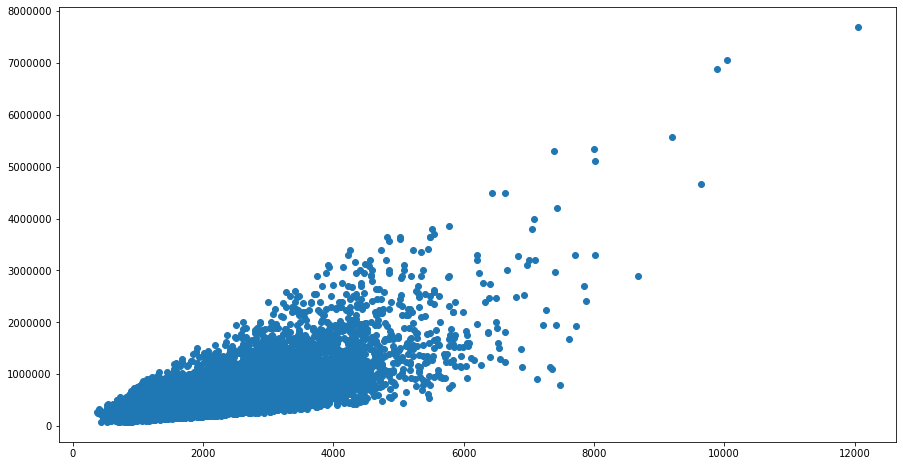

In [51]:
plt.figure(figsize=(15,8))
plt.ticklabel_format(axis='y', style='plain')
plt.scatter(X, Y)

In [118]:
all_data_regressor = LinearRegression()
all_data_regressor.fit(X, Y)

LinearRegression()

In [120]:
all_data_regressor.score(X, Y)

0.49291720753842005

In [52]:
ols_data = sm.add_constant(data)

In [53]:
ols_data

,const,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,1.0000,7129300520,2014-10-13,3,1.0000,1180,5650,1.0000,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650,221900
1,1.0000,6414100192,2014-12-09,3,2.2500,2570,7242,2.0000,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.3190,1690,7639,538000
2,1.0000,5631500400,2015-02-25,2,1.0000,770,10000,1.0000,0,0,3,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062,180000
3,1.0000,2487200875,2014-12-09,4,3.0000,1960,5000,1.0000,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000,604000
4,1.0000,1954400510,2015-02-18,3,2.0000,1680,8080,1.0000,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1.0000,263000018,2014-05-21,3,2.5000,1530,1131,3.0000,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.3460,1530,1509,360000
21593,1.0000,6600060120,2015-02-23,4,2.5000,2310,5813,2.0000,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.3620,1830,7200,400000
21594,1.0000,1523300141,2014-06-23,2,0.7500,1020,1350,2.0000,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.2990,1020,2007,402101
21595,1.0000,291310100,2015-01-16,3,2.5000,1600,2388,2.0000,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.0690,1410,1287,400000


After testing the model with the sqft_living and price the accuracy rate was low, multiple linear regression was applied to include more variables and improve the accuracy of the model.

In [54]:
x = ols_data[['const', 'sqft_living', 'bathrooms', 'grade', 'sqft_above', 'sqft_living15']]
y = ols_data['price']

In [55]:
model = sm.OLS(y, x).fit()

In [56]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     5161.
Date:                Wed, 21 Apr 2021   Prob (F-statistic):               0.00
Time:                        18:39:30   Log-Likelihood:            -2.9890e+05
No. Observations:               21597   AIC:                         5.978e+05
Df Residuals:                   21591   BIC:                         5.979e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -6.52e+05   1.36e+04    -48.079      0.000   -6.79e+05   -6.25e+05
sqft_living     245.5631      4.528     54.238      0.000     236.689     254.437
bathrooms     -3.567e+04   3440.363    -10.369      0.000   -4.24e+04   -2.89e+04
grade          1.119e+05   2470.776     45.293      0.000    1.07e+05    1.17e+05
sqft_above      -80.6961      4.458    -18.101      0.000     -89.434     -71.958
sqft_living15    22.2598      4.032      5.520      0.000      14.356      30.164
==============================================================================
Omnibus:                    17251.912   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1128620.760
Skew:                           3.361   Prob(JB):                         0.00
Kurtosis:                      37.771   Cond. No.                     2.96e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
data.groupby('zipcode')['price'].median().reset_index().sort_values('price', ascending = False)

,zipcode,price
24,98039,1895000.0000
3,98004,1150000.0000
25,98040,993750.0000
48,98112,915000.0000
4,98005,765475.0000
...,...,...
67,98188,264000.0000
0,98001,260000.0000
20,98032,249000.0000
1,98002,235000.0000


In [58]:
expensive = ols_data.loc[data['zipcode'] == 98039]

In [59]:
expensive

,const,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
2972,1.0000,3625049014,2014-08-29,4,3.5000,4860,23885,2.0000,0,0,3,12,4860,0,1996,0,98039,47.6172,-122.2300,3580,16054,2950000
3757,1.0000,2540700110,2015-02-12,4,3.5000,4210,18564,2.0000,0,0,3,11,4210,0,2001,0,98039,47.6206,-122.2250,3520,18564,1910000
4073,1.0000,3262300940,2014-11-07,3,1.0000,1220,8119,1.0000,0,0,4,7,1220,0,1955,0,98039,47.6328,-122.2360,1910,8119,875000
4074,1.0000,3262300940,2015-02-10,3,1.0000,1220,8119,1.0000,0,0,4,7,1220,0,1955,0,98039,47.6328,-122.2360,1910,8119,940000
4145,1.0000,6447300265,2014-10-14,4,5.5000,7080,16573,2.0000,0,0,3,12,5760,1320,2008,0,98039,47.6151,-122.2240,3140,15996,4000000
4407,1.0000,2470100110,2014-08-04,5,5.7500,9200,35069,2.0000,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.2330,3560,24345,5570000
4787,1.0000,2210500019,2015-03-24,3,1.0000,1320,8500,1.0000,0,0,4,7,1320,0,1954,0,98039,47.6187,-122.2260,2790,10800,937500
5173,1.0000,6447300345,2015-04-06,4,3.0000,2680,15438,2.0000,0,2,3,8,2680,0,1902,1956,98039,47.6109,-122.2260,4480,14406,1160000
5584,1.0000,6447300225,2014-11-06,3,2.7500,2620,17919,1.0000,0,1,4,9,2620,0,1949,0,98039,47.6144,-122.2280,3400,14400,1880000
5874,1.0000,2525049148,2014-10-07,5,5.0000,5450,20412,2.0000,0,0,3,11,5450,0,2014,0,98039,47.6209,-122.2370,3160,17825,3420000


In [60]:
x = expensive[['sqft_living']]
y = expensive[['price']]

In [ ]:
regressor = LinearRegression()
regressor.fit(x, y)

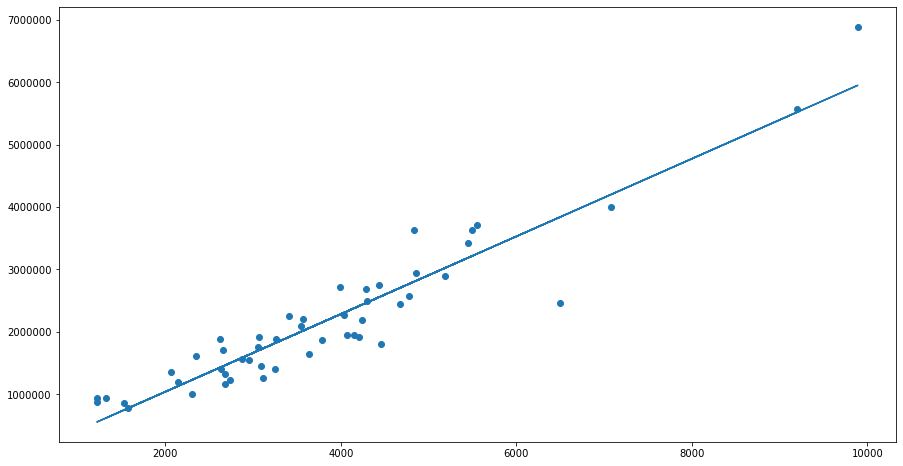

In [79]:
plt.figure(figsize=(15,8))
plt.ticklabel_format(axis='y', style='plain')
plt.scatter(x, y)
plt.plot(x, regressor.predict(x))

In [80]:
regressor.score(x, y)

0.885467873491298

In [87]:
np.array(range(20,25))

array([20, 21, 22, 23, 24])

In [95]:
expensive.corr()

,const,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id,NaN,1.0000,0.0671,0.2598,0.2751,0.0840,0.1588,-0.1158,0.3231,-0.2063,0.1597,0.2509,0.1191,0.0261,0.0498,NaN,0.0621,0.2270,0.1145,0.1769,0.2988
bedrooms,NaN,0.0671,1.0000,0.5898,0.5309,0.3093,0.4262,-0.0097,0.2235,-0.1755,0.5307,0.6162,-0.0648,0.4032,-0.2036,NaN,-0.1163,-0.0112,0.4064,0.3258,0.5171
bathrooms,NaN,0.2598,0.5898,1.0000,0.8787,0.4009,0.5406,0.0053,0.2384,-0.4326,0.8312,0.8731,0.2202,0.6395,-0.0642,NaN,-0.1215,-0.0526,0.3334,0.4187,0.8201
sqft_living,NaN,0.2751,0.5309,0.8787,1.0000,0.6296,0.4996,0.0842,0.3125,-0.3701,0.8572,0.9143,0.4277,0.6110,-0.0603,NaN,-0.0384,-0.0811,0.4222,0.5718,0.9410
sqft_lot,NaN,0.0840,0.3093,0.4009,0.6296,1.0000,0.2187,0.1052,0.4652,-0.0508,0.5394,0.5246,0.3831,0.2192,0.0314,NaN,0.2052,-0.3013,0.4690,0.7715,0.6597
floors,NaN,0.1588,0.4262,0.5406,0.4996,0.2187,1.0000,0.1266,0.1098,-0.4520,0.6716,0.6778,-0.2796,0.6568,-0.0603,NaN,-0.0878,0.1015,0.2053,0.1197,0.4874
waterfront,NaN,-0.1158,-0.0097,0.0053,0.0842,0.1052,0.1266,1.0000,0.5173,0.1294,0.1255,0.1392,-0.1030,0.0987,-0.0714,NaN,0.2453,-0.2216,0.1415,0.2008,0.1829
view,NaN,0.3231,0.2235,0.2384,0.3125,0.4652,0.1098,0.5173,1.0000,-0.0198,0.2195,0.2973,0.1078,0.0117,-0.0734,NaN,0.1569,-0.1613,0.4316,0.5664,0.4326
condition,NaN,-0.2063,-0.1755,-0.4326,-0.3701,-0.0508,-0.4520,0.1294,-0.0198,1.0000,-0.2857,-0.4027,-0.0148,-0.2788,-0.3312,NaN,0.0168,-0.0945,-0.0257,0.0208,-0.2528


In [96]:
x = expensive[['const', 'sqft_living', 'bathrooms', 'grade', 'yr_built', 'sqft_lot', 'sqft_lot15']]
y = expensive['price']

In [97]:
model1 = sm.OLS(y, x).fit()

In [98]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     83.11
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           4.99e-22
Time:                        19:06:03   Log-Likelihood:                -705.60
No. Observations:                  50   AIC:                             1425.
Df Residuals:                      43   BIC:                             1439.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.375e+06   6.77e+06     -0.498      0.621    -1.7e+07    1.03e+07
sqft_living   477.5269     81.349      5.870      0.000     313.472     641.582
bathrooms   -4.326e+04   9.12e+04     -0.474      0.638   -2.27e+05    1.41e+05
grade        1.214e+05    8.8e+04      1.379      0.175   -5.61e+04    2.99e+05
yr_built     1039.6306   3665.159      0.284      0.778   -6351.866    8431.128
sqft_lot      -11.6260     14.532     -0.800      0.428     -40.932      17.680
sqft_lot15     49.2124     13.840      3.556      0.001      21.301      77.124
==============================================================================
Omnibus:                        2.402   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.301   Jarque-Bera (JB):                1.425
Skew:                          -0.081   Prob(JB):                        0.490
Kurtosis:                       2.189   Cond. No.                     3.59e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [99]:
data

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.0000,1180,5650,1.0000,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650,221900
1,6414100192,2014-12-09,3,2.2500,2570,7242,2.0000,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.3190,1690,7639,538000
2,5631500400,2015-02-25,2,1.0000,770,10000,1.0000,0,0,3,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062,180000
3,2487200875,2014-12-09,4,3.0000,1960,5000,1.0000,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000,604000
4,1954400510,2015-02-18,3,2.0000,1680,8080,1.0000,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.5000,1530,1131,3.0000,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.3460,1530,1509,360000
21593,6600060120,2015-02-23,4,2.5000,2310,5813,2.0000,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.3620,1830,7200,400000
21594,1523300141,2014-06-23,2,0.7500,1020,1350,2.0000,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.2990,1020,2007,402101
21595,291310100,2015-01-16,3,2.5000,1600,2388,2.0000,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.0690,1410,1287,400000


Looking into the number of properties sold for each day in the data

In [107]:
data.date.value_counts().reset_index().rename(columns=({'index':'date','date': 'no_of_house_sold'}))

,date,no_of_house_sold
0,2014-06-23,142
1,2014-06-26,131
2,2014-06-25,131
3,2014-07-08,127
4,2015-04-27,126
...,...,...
367,2014-05-17,1
368,2014-07-27,1
369,2014-08-03,1
370,2014-11-02,1


In [315]:
data.loc[data['date'] == '2015-05-23']

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price


In [323]:
for i in data['date']:
    if str(i).startswith('2014-05'):
        print(i)

2014-05-12 00:00:00
2014-05-27 00:00:00
2014-05-28 00:00:00
2014-05-29 00:00:00
2014-05-14 00:00:00
2014-05-16 00:00:00
2014-05-28 00:00:00
2014-05-12 00:00:00
2014-05-19 00:00:00
2014-05-22 00:00:00
2014-05-16 00:00:00
2014-05-23 00:00:00
2014-05-12 00:00:00
2014-05-29 00:00:00
2014-05-07 00:00:00
2014-05-16 00:00:00
2014-05-07 00:00:00
2014-05-02 00:00:00
2014-05-30 00:00:00
2014-05-05 00:00:00
2014-05-15 00:00:00
2014-05-15 00:00:00
2014-05-27 00:00:00
2014-05-29 00:00:00
2014-05-29 00:00:00
2014-05-13 00:00:00
2014-05-19 00:00:00
2014-05-19 00:00:00
2014-05-29 00:00:00
2014-05-02 00:00:00
2014-05-13 00:00:00
2014-05-05 00:00:00
2014-05-20 00:00:00
2014-05-15 00:00:00
2014-05-12 00:00:00
2014-05-06 00:00:00
2014-05-20 00:00:00
2014-05-23 00:00:00
2014-05-12 00:00:00
2014-05-19 00:00:00
2014-05-02 00:00:00
2014-05-21 00:00:00
2014-05-27 00:00:00
2014-05-08 00:00:00
2014-05-23 00:00:00
2014-05-28 00:00:00
2014-05-16 00:00:00
2014-05-05 00:00:00
2014-05-21 00:00:00
2014-05-22 00:00:00


In [339]:
for i in data['date']:
    lst =  str(i).split()
    print(lst[0][:7])

2014-10
2014-12
2015-02
2014-12
2015-02
2014-05
2014-06
2015-01
2015-04
2015-03
2015-04
2014-05
2014-05
2014-10
2015-03
2015-01
2014-07
2014-05
2014-12
2015-04
2014-05
2014-08
2014-07
2014-05
2014-11
2014-11
2014-06
2014-12
2014-06
2015-03
2014-11
2014-12
2014-06
2014-11
2014-12
2014-06
2014-05
2014-12
2015-02
2014-06
2014-07
2014-08
2014-07
2014-10
2014-07
2014-07
2015-03
2014-07
2015-04
2015-03
2014-09
2015-02
2014-12
2015-02
2015-03
2014-05
2014-08
2015-04
2014-08
2015-02
2014-12
2014-08
2014-10
2014-12
2014-06
2014-11
2014-09
2014-10
2014-08
2014-06
2014-09
2015-01
2014-06
2014-07
2015-03
2014-11
2014-10
2015-04
2014-06
2015-03
2014-12
2014-12
2014-10
2015-01
2014-06
2014-11
2014-11
2014-06
2014-05
2014-09
2014-05
2015-03
2015-02
2014-07
2014-12
2014-09
2015-03
2014-09
2014-07
2014-05
2014-06
2014-10
2014-12
2014-10
2014-09
2015-04
2014-05
2014-07
2015-03
2014-08
2014-07
2015-03
2014-09
2014-11
2014-10
2014-11
2014-06
2014-06
2015-01
2015-05
2015-01
2014-11
2015-04
2014-11
2014-06


2015-04
2014-08
2014-09
2014-06
2014-10
2014-07
2014-10
2014-07
2014-05
2014-10
2014-08
2014-08
2014-08
2014-10
2015-03
2014-09
2014-11
2014-05
2014-09
2015-04
2014-06
2014-10
2014-09
2014-10
2015-05
2014-09
2014-07
2014-11
2014-12
2014-06
2014-10
2014-08
2014-06
2014-10
2015-04
2014-07
2015-04
2015-03
2014-06
2014-06
2015-02
2015-02
2014-05
2014-07
2015-03
2014-09
2014-12
2015-03
2015-04
2014-12
2014-05
2014-12
2015-03
2014-07
2014-11
2015-04
2014-07
2014-12
2014-08
2015-02
2014-12
2014-12
2014-12
2014-12
2014-07
2014-06
2014-08
2014-06
2014-05
2014-06
2015-05
2015-04
2014-06
2014-10
2015-05
2015-03
2014-09
2014-06
2014-11
2014-09
2014-12
2014-06
2014-12
2015-04
2015-01
2014-07
2015-04
2014-08
2015-02
2014-06
2014-10
2014-09
2015-03
2015-03
2014-10
2014-11
2015-04
2014-12
2014-08
2015-01
2015-01
2014-07
2014-10
2014-09
2015-04
2014-07
2014-05
2014-07
2015-02
2015-05
2014-06
2014-07
2014-11
2015-02
2015-04
2014-09
2015-04
2014-08
2014-08
2014-06
2015-04
2014-08
2015-02
2015-04
2014-06


2014-06
2014-06
2014-07
2014-09
2014-10
2015-02
2015-04
2015-03
2014-08
2014-05
2015-03
2015-04
2015-04
2015-04
2015-01
2015-04
2014-11
2014-05
2014-07
2014-11
2014-12
2015-02
2015-02
2014-09
2014-08
2014-09
2014-10
2014-09
2014-06
2015-04
2014-12
2014-08
2015-04
2014-10
2015-04
2015-02
2014-11
2015-02
2014-05
2015-03
2014-08
2014-11
2014-10
2014-08
2014-10
2014-09
2015-04
2014-06
2014-09
2014-11
2015-03
2015-04
2014-12
2014-05
2014-07
2015-01
2014-05
2014-12
2014-10
2014-12
2015-01
2015-03
2015-02
2014-09
2014-11
2015-02
2014-07
2015-04
2015-01
2014-12
2014-06
2015-04
2014-11
2014-06
2014-05
2015-03
2015-04
2015-05
2014-10
2014-07
2014-05
2015-05
2014-07
2014-12
2014-08
2015-05
2014-08
2014-09
2015-01
2014-07
2014-09
2014-11
2014-10
2014-10
2015-03
2015-04
2015-02
2015-02
2015-05
2014-08
2015-05
2014-10
2014-10
2014-07
2014-06
2014-06
2015-04
2014-05
2014-07
2014-06
2015-03
2014-10
2014-09
2014-09
2014-06
2014-06
2014-07
2014-06
2014-05
2015-03
2014-10
2014-05
2014-12
2014-07
2015-03


2014-11
2014-09
2015-01
2014-09
2015-03
2014-06
2014-06
2015-02
2014-11
2015-01
2015-03
2015-04
2014-07
2014-07
2014-12
2014-07
2014-06
2014-10
2015-02
2014-06
2015-03
2014-06
2014-07
2014-08
2014-10
2015-05
2014-05
2015-03
2014-08
2015-03
2014-07
2014-10
2015-01
2014-05
2014-10
2014-06
2015-04
2014-07
2014-10
2015-04
2015-04
2014-12
2014-08
2014-10
2014-08
2014-09
2015-04
2014-09
2015-03
2015-04
2014-08
2014-11
2015-03
2014-07
2015-04
2015-01
2014-10
2015-04
2014-08
2014-08
2014-05
2015-02
2014-06
2015-04
2015-04
2014-07
2014-07
2015-03
2014-12
2014-09
2015-04
2014-05
2014-06
2014-05
2014-09
2014-09
2015-04
2014-09
2015-03
2014-06
2015-01
2015-03
2014-09
2014-11
2014-11
2014-07
2015-04
2014-05
2015-01
2014-08
2015-02
2015-03
2014-11
2015-04
2014-07
2015-01
2014-05
2015-03
2014-08
2015-04
2014-05
2014-10
2015-03
2014-06
2014-12
2014-09
2015-03
2014-09
2015-04
2015-02
2015-04
2014-10
2014-12
2014-07
2014-06
2015-02
2015-04
2014-07
2014-11
2014-08
2014-05
2015-05
2014-07
2014-09
2014-06


2014-07
2014-11
2014-11
2015-01
2014-10
2014-12
2014-11
2014-06
2015-04
2014-06
2014-11
2014-07
2014-09
2015-03
2015-05
2014-07
2015-04
2014-10
2014-08
2015-03
2014-07
2014-10
2015-02
2014-10
2014-09
2015-02
2014-11
2014-05
2015-03
2015-04
2014-08
2015-02
2014-09
2014-12
2015-04
2014-07
2015-05
2014-09
2014-07
2014-08
2014-06
2014-09
2014-07
2014-05
2014-09
2014-06
2014-05
2015-04
2014-08
2014-05
2015-04
2014-09
2014-05
2015-03
2014-09
2014-09
2014-10
2014-06
2014-06
2015-04
2015-04
2014-09
2015-04
2014-09
2015-05
2014-08
2015-04
2014-07
2014-10
2014-08
2014-07
2014-07
2014-06
2014-11
2014-08
2015-01
2014-11
2014-09
2014-08
2014-09
2014-07
2014-11
2014-12
2014-10
2015-02
2014-10
2015-02
2014-10
2014-08
2014-05
2015-04
2014-07
2015-04
2014-10
2014-10
2014-11
2015-04
2014-05
2014-10
2014-05
2014-12
2014-09
2015-01
2015-03
2014-05
2014-07
2014-09
2015-02
2014-08
2015-04
2014-06
2014-07
2015-03
2014-05
2014-08
2014-08
2014-08
2015-03
2014-08
2014-06
2014-12
2015-04
2015-01
2014-05
2015-03


2015-01
2015-04
2014-12
2014-08
2014-05
2015-03
2015-05
2014-10
2015-04
2015-04
2014-10
2015-04
2014-05
2014-06
2014-06
2015-04
2014-11
2015-04
2015-03
2015-02
2014-10
2014-08
2015-03
2014-10
2014-05
2014-05
2014-05
2015-04
2014-06
2014-12
2014-10
2014-10
2014-08
2014-06
2014-10
2014-06
2014-06
2014-06
2014-11
2015-05
2014-08
2014-10
2015-02
2015-03
2014-06
2014-06
2015-02
2014-06
2014-09
2014-07
2015-04
2014-06
2014-05
2014-10
2014-08
2014-06
2014-12
2014-10
2014-10
2014-06
2014-06
2014-09
2014-06
2015-04
2015-04
2014-12
2014-06
2014-08
2015-04
2014-09
2014-07
2014-06
2015-03
2014-06
2014-12
2015-01
2015-01
2014-12
2014-08
2014-09
2014-10
2014-09
2014-05
2015-04
2014-09
2014-06
2014-07
2014-10
2014-07
2015-04
2014-06
2014-08
2015-05
2014-10
2014-09
2014-08
2014-10
2014-09
2014-06
2014-08
2014-11
2014-06
2014-12
2015-02
2015-05
2014-11
2014-10
2014-05
2015-02
2015-03
2014-07
2015-02
2014-07
2014-05
2014-12
2014-11
2014-06
2014-07
2014-10
2014-07
2014-12
2015-05
2015-04
2015-03
2014-12


2014-07
2014-11
2014-07
2014-09
2015-04
2014-10
2014-06
2014-08
2014-07
2014-12
2015-04
2014-07
2015-02
2014-10
2014-12
2015-03
2014-10
2014-06
2015-04
2014-08
2014-07
2015-04
2014-07
2014-09
2014-07
2014-10
2015-04
2014-06
2014-08
2015-04
2014-07
2014-07
2014-07
2015-03
2015-04
2014-07
2014-10
2015-04
2014-08
2014-08
2014-07
2014-12
2014-08
2014-09
2014-05
2015-02
2014-11
2014-11
2014-06
2014-07
2014-06
2015-04
2014-05
2014-06
2014-08
2014-07
2015-05
2014-07
2014-11
2014-05
2014-05
2014-10
2014-08
2014-09
2014-05
2014-09
2014-08
2015-04
2014-05
2014-06
2014-07
2014-06
2015-04
2014-12
2014-11
2014-05
2014-07
2014-08
2015-03
2015-05
2014-10
2014-12
2014-07
2014-10
2014-06
2014-05
2014-08
2014-11
2015-04
2014-10
2014-09
2014-12
2015-04
2015-03
2014-11
2015-02
2014-12
2014-09
2015-04
2015-03
2015-02
2015-04
2014-12
2015-04
2015-04
2014-06
2014-07
2014-12
2014-09
2015-04
2014-05
2014-12
2014-11
2015-04
2014-10
2014-07
2015-05
2014-07
2014-05
2014-11
2014-10
2014-07
2015-02
2014-09
2014-12


2014-08
2015-03
2014-11
2014-07
2014-08
2015-04
2014-06
2015-05
2014-10
2014-07
2014-05
2014-05
2014-05
2014-06
2014-09
2014-06
2014-11
2015-03
2014-07
2015-04
2015-03
2015-04
2014-06
2015-03
2014-06
2014-08
2015-04
2015-03
2014-11
2014-11
2014-09
2015-04
2014-07
2015-04
2015-04
2014-06
2014-10
2014-09
2014-10
2015-02
2015-04
2014-12
2015-04
2014-05
2014-07
2014-12
2014-05
2015-04
2014-06
2014-08
2014-06
2014-09
2014-11
2014-11
2014-10
2014-07
2014-08
2014-05
2015-04
2015-04
2015-04
2014-05
2014-05
2014-12
2015-04
2015-01
2015-02
2014-08
2014-12
2014-05
2014-06
2014-10
2014-05
2014-06
2014-10
2014-10
2014-09
2014-12
2015-03
2015-01
2014-10
2015-01
2015-02
2015-02
2015-03
2014-07
2015-05
2015-02
2014-10
2015-03
2014-05
2015-01
2014-05
2015-03
2014-07
2014-08
2014-06
2015-04
2014-10
2014-07
2014-12
2014-07
2015-03
2014-12
2014-11
2014-06
2014-12
2014-07
2015-05
2015-04
2015-01
2015-05
2014-10
2015-02
2015-04
2014-11
2015-01
2014-12
2014-07
2014-07
2014-06
2014-07
2014-12
2014-08
2015-01


2015-02
2015-03
2015-05
2015-04
2014-06
2015-01
2014-07
2015-03
2014-11
2015-04
2014-12
2014-07
2014-05
2014-09
2014-10
2015-04
2014-07
2015-02
2015-01
2014-11
2014-07
2014-06
2015-04
2014-10
2014-05
2015-03
2014-05
2014-06
2014-06
2014-12
2014-11
2015-05
2014-05
2014-11
2014-11
2015-05
2015-04
2014-05
2014-09
2014-05
2014-08
2014-07
2014-06
2014-10
2015-01
2015-04
2014-10
2015-02
2015-03
2014-10
2014-07
2015-02
2014-08
2015-03
2014-08
2014-12
2014-07
2014-07
2014-12
2014-12
2014-12
2014-09
2014-07
2014-12
2015-03
2014-11
2015-04
2015-01
2014-10
2014-07
2014-08
2014-09
2014-07
2014-08
2014-10
2014-09
2014-05
2015-01
2014-10
2014-05
2015-03
2014-09
2015-04
2014-12
2014-09
2015-04
2014-09
2014-07
2014-06
2014-10
2014-10
2014-11
2015-03
2014-10
2014-10
2015-04
2014-10
2015-03
2014-11
2014-09
2014-08
2014-11
2015-02
2014-06
2015-03
2014-11
2014-12
2015-02
2014-10
2015-05
2014-09
2014-08
2015-04
2014-05
2014-05
2014-05
2014-12
2014-06
2014-05
2014-07
2014-10
2015-01
2014-10
2014-05
2014-06


In [108]:
data['month'] = [str(i).split()[0][:7] for i in data['date']]

Confirming our new column we added to the dataframe

In [111]:
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,month
0,7129300520,2014-10-13,3,1.0000,1180,5650,1.0000,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650,221900,2014-10
1,6414100192,2014-12-09,3,2.2500,2570,7242,2.0000,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.3190,1690,7639,538000,2014-12
2,5631500400,2015-02-25,2,1.0000,770,10000,1.0000,0,0,3,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062,180000,2015-02
3,2487200875,2014-12-09,4,3.0000,1960,5000,1.0000,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000,604000,2014-12
4,1954400510,2015-02-18,3,2.0000,1680,8080,1.0000,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503,510000,2015-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.5000,1530,1131,3.0000,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.3460,1530,1509,360000,2014-05
21593,6600060120,2015-02-23,4,2.5000,2310,5813,2.0000,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.3620,1830,7200,400000,2015-02
21594,1523300141,2014-06-23,2,0.7500,1020,1350,2.0000,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.2990,1020,2007,402101,2014-06
21595,291310100,2015-01-16,3,2.5000,1600,2388,2.0000,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.0690,1410,1287,400000,2015-01


In [113]:
month_sales = data.groupby('month')['price'].count().reset_index()
month_sales

,month,price
0,2014-05,1768
1,2014-06,2178
2,2014-07,2211
3,2014-08,1939
4,2014-09,1771
5,2014-10,1876
6,2014-11,1409
7,2014-12,1470
8,2015-01,978
9,2015-02,1247


Visualising the trend of number of properties sold for each month

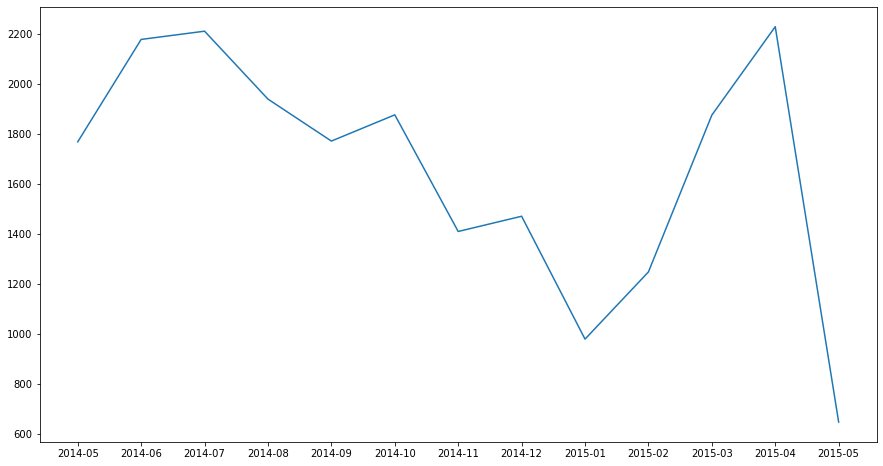

In [117]:
plt.figure(figsize=(15,8))
plt.plot(month_sales['month'],month_sales['price'])
           